In [4]:
import utils
import skimage
import skimage.morphology
import numpy as np

In [5]:
def remove_noise(im: np.ndarray) -> np.ndarray:
    """
        A function that removes noise in the input image.
        args:
            im: np.ndarray of shape (H, W) with boolean values (dtype=bool)
        return:
            (np.ndarray) of shape (H, W). dtype=bool
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    # You can also define other helper functions
    structelem = skimage.morphology.disk(8)
    im = skimage.morphology.binary_closing(im, footprint=structelem)
    im = skimage.morphology.binary_opening(im, footprint=structelem)
    return im
    ### END YOUR CODE HERE ###

Reading image: images/noisy.png
Saving image to: image_processed/noisy-filtered.png


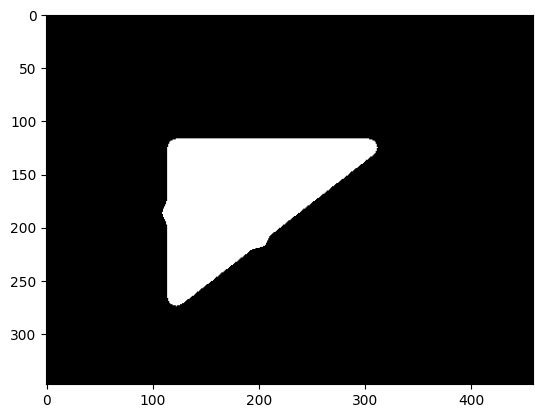

In [6]:
from matplotlib import pyplot as plt


if __name__ == "__main__":
    # DO NOT CHANGE
    im = utils.read_image("noisy.png")

    binary_image = (im != 0)
    noise_free_image = remove_noise(binary_image)

    assert im.shape == noise_free_image.shape, "Expected image shape ({}) to be same as resulting image shape ({})".format(
            im.shape, noise_free_image.shape)
    assert noise_free_image.dtype == bool, "Expected resulting image dtype to be bool. Was: {}".format(
            noise_free_image.dtype)

    noise_free_image = utils.to_uint8(noise_free_image)
    plt.imshow(noise_free_image, cmap='gray')
    utils.save_im("noisy-filtered.png", noise_free_image)